In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4d694ba7-626b-461e-bcea-eb96178d8ee3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [3]:
type(data)

dict

In [4]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11747,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975977e+07,1.975977e+07,False,NaN,1,NaN,NaN,None,2024-09-27T23:33:00.000Z,65766.987856,3.219533e+10,-12.6622,-0.223575,1.276874,4.101602,11.284843,-1.850357,7.949644,1.299541e+12,56.1092,1.381107e+12,None,2024-09-27T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
1,1027,Ethereum,ETH,ethereum,9364,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203632e+08,1.203632e+08,True,NaN,2,NaN,NaN,None,2024-09-27T23:32:00.000Z,2699.632857,1.707700e+10,-1.8101,-0.016760,2.727070,5.915562,6.890932,-18.964830,-19.992941,3.249365e+11,14.0295,3.249365e+11,None,2024-09-27T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
2,825,Tether USDt,USDT,tether,98924,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.193543e+11,1.213727e+11,True,NaN,3,NaN,NaN,None,2024-09-27T23:32:00.000Z,1.000136,6.214564e+10,-7.2669,-0.003182,-0.005100,-0.001204,-0.006383,0.015530,0.170987,1.193705e+11,5.1540,1.213892e+11,None,2024-09-27T23:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-27 16:34:33.079597
3,1839,BNB,BNB,bnb,2250,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459330e+08,1.459330e+08,False,NaN,4,NaN,NaN,None,2024-09-27T23:32:00.000Z,608.628373,2.147530e+09,3.5519,-0.034754,2.282631,7.136662,13.429208,5.564743,6.905708,8.881898e+10,3.8334,8.881898e+10,None,2024-09-27T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
4,5426,Solana,SOL,solana,747,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.688272e+08,5.853770e+08,True,NaN,5,NaN,NaN,None,2024-09-27T23:32:00.000Z,157.770194,2.767105e+09,-8.4905,-0.264109,1.777592,7.391536,9.600829,-13.909553,12.573947,7.396696e+10,3.1914,9.235504e+10,None,2024-09-27T23:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
5,3408,USDC,USDC,usd-coin,22229,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.628491e+10,3.628491e+10,False,NaN,6,NaN,NaN,None,2024-09-27T23:32:00.000Z,0.999873,5.853028e+09,-14.5686,-0.003244,-0.010960,-0.013520,-0.005902,-0.021681,-0.001627,3.628031e+10,1.5654,3.628031e+10,None,2024-09-27T23:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-27 16:34:33.079597
6,52,XRP,XRP,xrp,1397,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.656404e+10,9.998716e+10,False,NaN,7,NaN,NaN,None,2024-09-27T23:33:00.000Z,0.588486,1.235531e+09,2.0089,0.067704,-0.181093,0.428433,3.122827,-2.320053,24.735813,3.328717e+10,1.4372,5.884864e+10,None,2024-09-27T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
7,74,Dogecoin,DOGE,dogecoin,1074,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.461360e+11,1.461360e+11,True,NaN,8,NaN,NaN,None,2024-09-27T23:33:00.000Z,0.123982,1.377825e+09,2.6983,-0.081043,5.435696,17.664405,24.548729,-3.740573,1.873236,1.811826e+10,0.7823,1.811826e+10,None,2024-09-27T23:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-27 16:34:33.079597
8,11419,Toncoin,TON,toncoin,569,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.535859e+09,5.1

In [6]:
#Data pull automation
import os
def get_daily_data():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '4d694ba7-626b-461e-bcea-eb96178d8ee3',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

if not os.path.isfile(r'C:\Users\sarp_\Desktop\X\Data Analyst\Data_Analyst_Projects\crypto_automation\Datas\API.csv'):
    # Dosya yoksa, sütun başlıklarıyla birlikte dosyayı oluştur ve yaz
    df.to_csv(r'C:\Users\sarp_\Desktop\X\Data Analyst\Data_Analyst_Projects\crypto_automation\Datas\API.csv', index=False, header=True)
else:
    # Dosya varsa, ekleme modunda veriyi ekle ve sütun başlıklarını yazma
    df.to_csv(r'C:\Users\sarp_\Desktop\X\Data Analyst\Data_Analyst_Projects\crypto_automation\Datas\API.csv', mode='a', index=False, header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [7]:
# import os 
# from time import time
# from time import sleep
# from datetime import datetime

# # Boş bir DataFrame oluşturun

# for i in range(333):
#     get_daily_data()
#     current_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')  # Zaman damgası al
#     print(f'API Runner completed at {current_time}')
#     sleep(60)  # Her bir istekte 1 dakika bekle

In [47]:
df72 = pd.read_csv(r'C:\Users\sarp_\Desktop\X\Data Analyst\Data_Analyst_Projects\crypto_automation\Datas\API.csv')
df72

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11705,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19756762.00,19756762.00,False,NaN,1,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,63176.23,35253719926.89,-18.68,-0.16,0.26,4.38,3.42,-6.33,-1.71,1248157690229.76,56.79,1326700776920.07,NaN,2024-09-20T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
1,1027,Ethereum,ETH,ethereum,9334,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120345932.99,120345932.99,True,NaN,2,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,2553.62,19104378873.87,2.95,-0.06,3.43,4.51,-2.66,-25.82,-26.96,307317668266.19,13.98,307317668266.19,NaN,2024-09-20T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
2,825,Tether USDt,USDT,tether,98190,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,119166241913.55,121386817751.62,True,NaN,3,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,1.00,63041744164.08,-9.36,0.00,-0.01,-0.05,-0.02,-0.03,0.03,119175768451.09,5.42,121396521809.22,NaN,2024-09-20T23:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-20 16:41:47.161082
3,1839,BNB,BNB,bnb,2239,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,145933649.30,145933649.30,False,NaN,4,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,568.43,1822592994.57,-2.50,-0.05,0.53,2.05,-0.02,-3.81,-3.66,82952338403.13,3.77,82952338403.13,NaN,2024-09-20T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
4,5426,Solana,SOL,solana,738,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,468489778.18,584918723.50,True,NaN,5,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,146.91,3217325233.63,11.63,-0.21,3.14,5.86,3.25,-17.69,10.10,68824398057.85,3.13,85928617725.28,NaN,2024-09-20T23:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
5,3408,USDC,USDC,usd-coin,22151,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,35798701403.90,35798701403.90,False,NaN,6,NaN,NaN,NaN,2024-09-20T23:39:00.000Z,1.00,6061251403.76,-15.43,-0.00,0.00,-0.02,0.01,-0.01,-0.03,35796577325.50,1.63,35796577325.50,NaN,2024-09-20T23:39:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-20 16:41:47.161082
6,52,XRP,XRP,xrp,1392,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,56434507880.00,99987205428.00,False,NaN,7,NaN,NaN,NaN,2024-09-20T23:40:00.000Z,0.59,1224285315.13,-1.14,-0.24,-0.26,2.46,-2.27,-3.13,20.41,33069943689.64,1.50,58598798734.92,NaN,2024-09-20T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
7,74,Dogecoin,DOGE,dogecoin,1068,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,146041016383.71,146041016383.71,True,NaN,8,NaN,NaN,NaN,2024-09-20T23:40:00.000Z,0.11,595351513.10,-10.16,-0.34,0.19,-1.18,-0.47,-23.55,-14.82,15399430748.81,0.70,15399430748.81,NaN,2024-09-20T23:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-20 16:41:47.161082
8,11419,Toncoin,TON,toncoin,560,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2532645398.83,5112100117.67,True,NaN,9,3414166606.00,19029985842.28,NaN,2024-09-20T23:39:00.000Z,5.57,275092282.60,-2.96,-0.32,-1.82,-3.55,-14.33,-20.04,-24.02,14116536081.89,0.64,28493979377.75,NaN,2024-09-

In [9]:
#Change number looks
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [10]:
#Copy of original data
df_temp = df72.copy()

In [11]:
# Now let's look at the coin trends over time
df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03,0.56,4.63,3.90,-5.72,0.46
Ethereum,0.20,2.97,5.85,-1.72,-23.96,-25.34
Tether USDt,-0.00,-0.01,-0.04,-0.02,-0.02,0.06
BNB,0.03,0.50,3.91,2.26,-1.27,-1.18
Solana,-0.16,2.73,6.62,2.50,-17.49,10.01
USDC,-0.01,0.00,-0.01,0.00,-0.01,-0.01
XRP,-0.20,-0.21,1.77,-1.67,-3.11,21.48
Dogecoin,-0.15,1.23,2.23,2.58,-20.31,-12.26
Toncoin,0.00,-0.89,-1.55,-10.18,-18.32,-23.88


In [12]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.03
              quote.USD.percent_change_24h     0.56
              quote.USD.percent_change_7d      4.63
              quote.USD.percent_change_30d     3.90
              quote.USD.percent_change_60d    -5.72
              quote.USD.percent_change_90d     0.46
Ethereum      quote.USD.percent_change_1h      0.20
              quote.USD.percent_change_24h     2.97
              quote.USD.percent_change_7d      5.85
              quote.USD.percent_change_30d    -1.72
              quote.USD.percent_change_60d   -23.96
              quote.USD.percent_change_90d   -25.34
Tether USDt   quote.USD.percent_change_1h     -0.00
              quote.USD.percent_change_24h    -0.01
              quote.USD.percent_change_7d     -0.04
              quote.USD.percent_change_30d    -0.02
              quote.USD.percent_change_60d    -0.02
              quote.USD.percent_change_90d     0.06
BNB           quote.U

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h     0.03
             quote.USD.percent_change_24h    0.56
             quote.USD.percent_change_7d     4.63
             quote.USD.percent_change_30d    3.90
             quote.USD.percent_change_60d   -5.72
             quote.USD.percent_change_90d    0.46
Ethereum     quote.USD.percent_change_1h     0.20
             quote.USD.percent_change_24h    2.97
             quote.USD.percent_change_7d     5.85
             quote.USD.percent_change_30d   -1.72
             quote.USD.percent_change_60d  -23.96
             quote.USD.percent_change_90d  -25.34
Tether USDt  quote.USD.percent_change_1h    -0.00
             quote.USD.percent_change_24h   -0.01
             quote.USD.percent_change_7d    -0.04
             quote.USD.percent_change_30d   -0.02
             quote.USD.percent_change_60d   -0.02
             quote.USD.percent_change_90d    0.06
BNB          quote.USD.percent_change_1h     0.03
             quote.USD.percent_change_24h    0.50
             quote.USD.percent_change_7d     3.91
             quote.USD.percent_change_30d    2.26
             quote.USD.percent_change_60d   -1.27
             quote.USD.percent_change_90d   -1.18
Solana       quote.USD.percent_change_1h    -0.16
             quote.USD.percent_change_24h    2.73
             quote.USD.percent_change_7d     6.62
             quote.USD.percent_change_30d    2.50
             quote.USD.percent_change_60d  -17.49
             quote.USD.percent_change_90d   10.01
USDC         quote.USD.percent_change_1h    -0.01
             quote.USD.percent_change_24h    0.00
             quote.USD.percent_change_7d    -0.01
             quote.USD.percent_change_30d    0.00
             quote.USD.percent_change_60d   -0.01
             quote.USD.percent_change_90d   -0.01
XRP          quote.USD.percent_change_1h    -0.20
             quote.USD.percent_change_24h   -0.21
             quote.USD.percent_change_7d     1.77
             quote.USD.percent_change_30d   -1.67
             quote.USD.percent_change_60d   -3.11
             quote.USD.percent_change_90d   21.48
Dogecoin     quote.USD.percent_change_1h    -0.15
             quote.USD.percent_change_24h    1.23
             quote.USD.percent_change_7d     2.23
             quote.USD.percent_change_30d    2.58
             quote.USD.percent_change_60d  -20.31
             quote.USD.percent_change_90d  -12.26
Toncoin      quote.USD.percent_change_1h     0.00
             quote.USD.percent_change_24h   -0.89
             quote.USD.percent_change_7d    -1.55
             quote.USD.percent_change_30d  -10.18
             quote.USD.percent_change_60d  -18.32
             quote.USD.percent_change_90d  -23.88
TRON         quote.USD.percent_change_1h     0.02
             quote.USD.percent_change_24h    0.35
             quote.USD.percent_change_7d     1.87
             quote.USD.percent_change_30d   -2.18
             quote.USD.percent_change_60d   13.96
             quote.USD.percent_change_90d   26.22
Cardano      quote.USD.percent_change_1h    -0.03
             quote.USD.percent_change_24h    1.18
             quote.USD.percent_change_7d     1.96
             quote.USD.percent_change_30d   -1.53
             quote.USD.percent_change_60d  -14.10
             quote.USD.percent_change_90d   -5.92
Avalanche    quote.USD.percent_change_1h     0.08
             quote.USD.percent_change_24h    3.39
             quote.USD.percent_change_7d    11.36
             quote.USD.percent_change_30d   17.00
             quote.USD.percent_change_60d   -8.99
             quote.USD.percent_change_90d    7.59
Shiba Inu    quote.USD.percent_change_1h    -0.03
             quote.USD.percent_change_24h    2.90
             quote.USD.percent_change_7d     8.74
             quote.USD.percent_change_30d    7.04
             quote.USD.percent_change_60d  -12.42
             quote.USD.percent_change_90d  -14.34
Chainlink    quote.USD.percent_change_1h   

In [17]:
df5.count()

values    96
dtype: int64

In [ ]:
#Checking Nan values -----------------------------------------

In [18]:
len(df5)

96

In [19]:
df5.isnull().sum()

values    0
dtype: int64

In [20]:
df5.notnull().sum()

values    96
dtype: int64

In [21]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 96 entries, ('Bitcoin', 'quote.USD.percent_change_1h') to ('Polkadot', 'quote.USD.percent_change_90d')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   values  96 non-null     float64
dtypes: float64(1)
memory usage: 1.9+ KB


In [ ]:
#We assign a custom index to the DataFrame---------------------

In [ ]:
index = pd.Index(range(1, len(df5) + 1))

df6 = df5.set_index(index)
df6

In [29]:
df6 = df5.reset_index(drop=True)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03
1,Bitcoin,quote.USD.percent_change_24h,0.56
2,Bitcoin,quote.USD.percent_change_7d,4.63
3,Bitcoin,quote.USD.percent_change_30d,3.90
4,Bitcoin,quote.USD.percent_change_60d,-5.72
5,Bitcoin,quote.USD.percent_change_90d,0.46
6,Ethereum,quote.USD.percent_change_1h,0.20
7,Ethereum,quote.USD.percent_change_24h,2.97
8,Ethereum,quote.USD.percent_change_7d,5.85
9,Ethereum,quote.USD.percent_change_30d,-1.72


In [ ]:
# Column Name Change----------------------------------------

In [30]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03
1,Bitcoin,quote.USD.percent_change_24h,0.56
2,Bitcoin,quote.USD.percent_change_7d,4.63
3,Bitcoin,quote.USD.percent_change_30d,3.90
4,Bitcoin,quote.USD.percent_change_60d,-5.72
5,Bitcoin,quote.USD.percent_change_90d,0.46
6,Ethereum,quote.USD.percent_change_1h,0.20
7,Ethereum,quote.USD.percent_change_24h,2.97
8,Ethereum,quote.USD.percent_change_7d,5.85
9,Ethereum,quote.USD.percent_change_30d,-1.72


In [37]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03
1,Bitcoin,24h,0.56
2,Bitcoin,7d,4.63
3,Bitcoin,30d,3.90
4,Bitcoin,60d,-5.72
5,Bitcoin,90d,0.46
6,Ethereum,1h,0.20
7,Ethereum,24h,2.97
8,Ethereum,7d,5.85
9,Ethereum,30d,-1.72


In [ ]:
#Visualization----------------------------

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

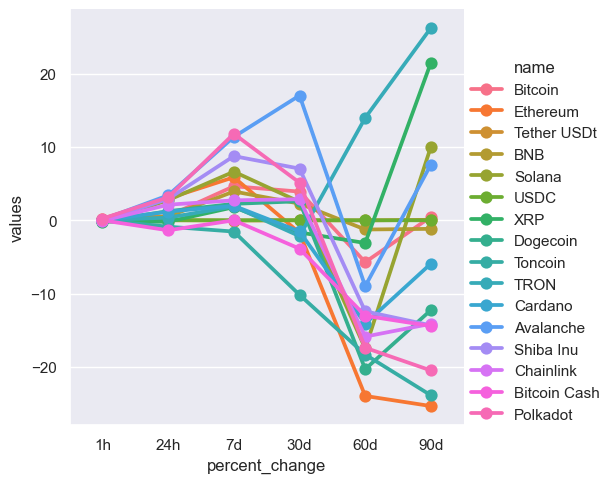

In [45]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
# sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point', palette='Set2')
plt.show()


In [50]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,63176.23,2024-09-20 16:41:47.161082
15,Bitcoin,63191.58,2024-09-20 16:42:47.313164
30,Bitcoin,63184.34,2024-09-20 16:59:31.405158
45,Bitcoin,63184.34,2024-09-20 17:00:31.709657
60,Bitcoin,63172.12,2024-09-20 17:03:11.213030
75,Bitcoin,63170.99,2024-09-20 17:04:14.200482
90,Bitcoin,64267.11,2024-09-24 13:24:08.550188
105,Bitcoin,65766.99,2024-09-27 16:34:33.079597


In [ ]:
# df72['name'].value_counts()['Bitcoin']
# df72['name'].value_counts()

<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

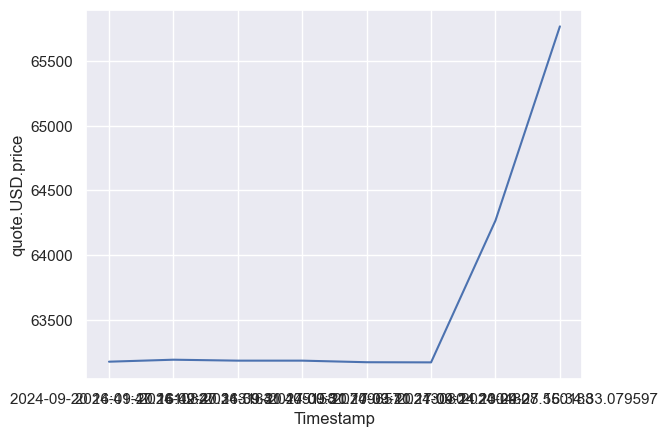

In [52]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)